In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

C:\Users\aryan\AppData\Local\Temp\ipykernel_9928\1290783986.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('glacier.csv')


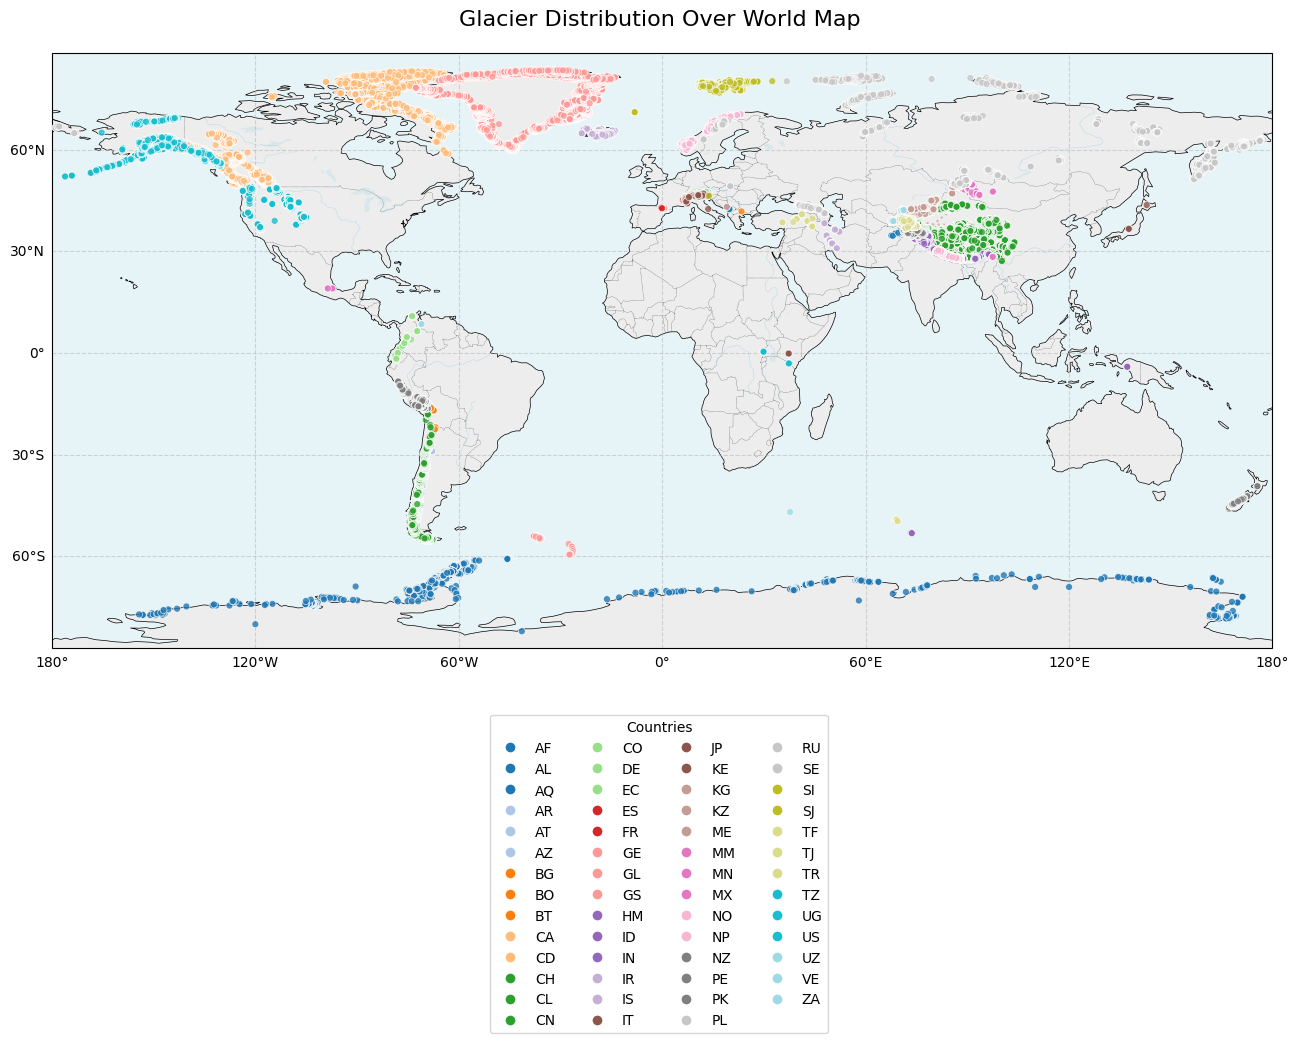

In [2]:
# Load the data from CSV
df = pd.read_csv('glacier.csv')

# Set up the map projection
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # Standard rectangular projection

# Add detailed map features
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.4)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.3)
ax.add_feature(cfeature.LAKES, alpha=0.3, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, linewidth=0.3, edgecolor='lightblue')

# Create color map for countries
unique_countries = df['country'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_countries)))
color_dict = dict(zip(unique_countries, colors))

# Create scatter plot with country colors (on top of map)
scatter = ax.scatter(
    x=df['longitude'],
    y=df['latitude'],
    c=df['country'].map(color_dict),
    s=25,  # Slightly larger points
    alpha=0.8,  # More opaque
    edgecolor='w',
    linewidth=0.5,
    transform=ccrs.PlateCarree(),  # Important for correct positioning
    zorder=10  # Ensure points appear above map features
)

# Set axis limits with small padding
ax.set_xlim(df['longitude'].min()-5, df['longitude'].max()+5)
ax.set_ylim(df['latitude'].min()-5, df['latitude'].max()+5)

# Add grid and labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
plt.title('Glacier Distribution Over World Map', fontsize=16, pad=20)

# Add mountain range indicators (optional)
ax.plot([70, 80, 85], [40, 38, 42], 'brown', linestyle=':', alpha=0.3, 
        transform=ccrs.PlateCarree(), label='Mountain ranges')
ax.plot([75, 82, 90], [36, 38, 37], 'brown', linestyle=':', alpha=0.3,
        transform=ccrs.PlateCarree())

# Create custom legend for countries
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=country,
                   markerfacecolor=color_dict[country], markersize=8) 
                   for country in unique_countries]

# Position horizontal legend below
plt.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
    title='Countries',
    frameon=True,
    fancybox=True
)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.show()

Each plot corresponds to the country of origin.
For each plot, we show the logitude and lattitude visualized over a world map.
This can be used to find trends in various areas.
This can be combined with other data such as elevation change trends and can be used to diagnose the cause in the region and a possible solution even.